# Dashboard 

*Disclaimer: Das Dashboard wurde zunächst mit Vise-Coding aufgebaut: Es wurde mit ChatGPT konzipiert und in allen Details manuell optimiert.*

Zum Abschluss des Projekts soll ein interaktives Dashboard mit Streamlit erstellt werden.

in einem ersten Schritt wird ein MVP (Minimal Viable Product) entworfen, um die Funktionalitäten zu entwickeln und zu testen. Das MVP enthält nur Daten aus drei Städten: Hamburg, Berlin und Karlsruhe.

Der Datensatz für das MVP ist gespeichert als `test_dashboard_air_quality.csv`.



# 🧭 Plan für das Streamlit-Dashboard zur Luftqualität

## ✅ 1. Basisfunktionen (bereits umgesetzt oder fast fertig):

- Dropdown zur Stadtauswahl (Stadt A & Stadt B)
- Dropdown zur Schadstoffauswahl (z. B. PM2.5, NO₂, SO₂, O₃, CO)
- Liniendiagramm mit dem gewählten Schadstoff über die Zeit
- Vergleich zweier Städte im gemeinsamen Diagramm
- Achsen-Labels und Titel verbessern (PM2.5 statt „Pm25“ usw.)

## 🧩 2. Nächste Ausbaustufe (geplant):
a) Zusätzliche Filtermöglichkeiten

- Auswahl eines Jahres oder Monats (Slider oder Selectbox)
- Filter nach Jahreszeit (z. B. Frühling, Sommer...)

b) Statistische Kennzahlen

- Durchschnitt, Minimum, Maximum des gewählten Schadstoffs für jede Stadt
- Darstellung unterhalb des Plots oder in einer kleinen Infobox

c) Darstellung Wetterdaten

- Auswahl eines Wetterparameters (Tavg, Humidity, etc.)
- Zweiter Plot oder zusätzliche Linie im selben Plot (Sekundärachse)

## 🖼 3. Späterer Ausbau (optional):
a) Interaktive Visualisierungen mit Plotly

- Hover-Effekte, dynamisches Zoomen, bessere Tooltips

b) Karte mit Clusterfarben

- z. B. Städte auf einer Karte mit Farben nach Cluster oder Mittelwert PM2.5

c) Infoboxen / Erläuterungen

- Kleine Textboxen mit verständlichen Erklärungen zur Interpretation der Daten
- Z. B. „PM2.5 ist Feinstaub unter 2.5 Mikrometer…“

d) Dashboard mit Datums- und Städteauswahl

- Auswahl eines Datums → Anzeige der Messwerte für alle Variablen
- Interaktive Heatmap oder Vergleichstabelle

## 📚 Inhaltsverzeichnis 
(Diese Art von Inhaltsverzeichnis mit Link funktioniert leider in Notebooks nicht, weil die as JSON gespeichert werden und nicht als HTML...)

- [0. Datensatz laden](#0-datensatz-laden)
- [1. Dataframe für MVP vorbereiten]


# 0. Datensatz laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/cleaned_air_quality_data_2025-03-27.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,So2,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2019,2,28,SA,Abha,18.21639,42.50528,5616633.0,NaN,NaN,...,NaN,6.0,45.0,18.8,15.8,24.1,NaN,183.0,21.9,1022.3
1,2019,3,1,SA,Abha,18.21639,42.50528,5616633.0,NaN,NaN,...,NaN,12.0,64.0,17.0,13.5,23.0,NaN,185.0,21.2,1021.9
2,2019,3,2,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,9.0,63.0,16.7,10.8,23.6,NaN,186.0,15.2,1022.3
3,2019,3,3,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,6.0,55.0,15.9,10.8,22.0,NaN,196.0,16.5,1023.4
4,2019,3,4,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,3.0,58.0,16.1,9.0,22.5,NaN,NaN,11.2,1023.8


# 1. Dataframe für MVP vorbereiten

Für das MVP sollten drei Städte gewählt werden, die möglichst vollständige Messdaten für alle relevanten Variablen übermittelt haben, damit die Funktionalitäten gut getestet werden können. Auch sollte die Anzahl an Datenpunkten pro Stadt ausreichend sein und den geamten relevanten Zeitraum abdecken.

In [3]:
# Optional: nur Spalten betrachten, die im Dashboard relevant sind
relevante_spalten = ["City", "Year", "Month", "Day", "Pm25", "Co", "No2", "So2", "O3", "Tavg", "Humidity"]
df = df[relevante_spalten]

# NaN-Anzahl je Stadt berechnen (über alle relevanten Spalten hinweg)
stadt_nan = df.groupby("City").apply(lambda x: x.isna().sum().sum())

# Alternativ: Anteil an NaN-Werten je Stadt
stadt_nan_anteil = df.groupby("City").apply(lambda x: x.isna().mean().mean())

# Sortieren: Städte mit den wenigsten fehlenden Werten zuerst
stadt_nan = stadt_nan.sort_values()
stadt_nan_anteil = stadt_nan_anteil.sort_values()

# Die Top 10 anzeigen
print("Städte mit absolut wenigsten NaNs:")
print(stadt_nan.head(10))

print("\nStädte mit dem geringsten Anteil an NaNs:")
print(stadt_nan_anteil.head(10))


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/3330810853.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stadt_nan = df.groupby("City").apply(lambda x: x.isna().sum().sum())


Städte mit absolut wenigsten NaNs:
City
Saint petersburg      152
Shillong              279
Nizhniy novgorod      283
Ghāziābād             296
Bhopal                356
Thiruvananthapuram    405
Tuzla                 638
Chandigarh            643
Mysore                691
Patna                 707
dtype: int64

Städte mit dem geringsten Anteil an NaNs:
City
Ghāziābād             0.012943
Shillong              0.013238
Bhopal                0.014921
Thiruvananthapuram    0.016320
Chandigarh            0.023504
Tuzla                 0.023645
Patna                 0.024448
Delhi                 0.024937
Tokyo                 0.025256
Osaka                 0.025288
dtype: float64


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/3330810853.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stadt_nan_anteil = df.groupby("City").apply(lambda x: x.isna().mean().mean())


In [4]:
# Liste der drei gewünschten Städte
städte = ["Delhi", "Tokyo", "Osaka"]

# Relevante Spalten definieren
relevante_spalten = ["Pm25", "Co", "No2", "So2", "O3", "Tavg", "Humidity"]

# DataFrame auf die drei Städte und die relevanten Spalten beschränken
df_subset = df[df["City"].isin(städte)][["City"] + relevante_spalten]

# Fehlende Werte je Stadt und Variable zählen
fehlende_werte = df_subset.groupby("City").apply(lambda x: x[relevante_spalten].isna().sum())

# Alternativ: Anteil an NaN-Werten je Stadt und Variable
anteil_nan = df_subset.groupby("City").apply(lambda x: x[relevante_spalten].isna().mean())

# Ergebnisse anzeigen
print("Anzahl fehlender Werte:")
print(fehlende_werte)

print("\nAnteil fehlender Werte:")
print(anteil_nan.round(2))


Anzahl fehlender Werte:
       Pm25  Co  No2  So2  O3  Tavg  Humidity
City                                         
Delhi     3   0    0    0   0    70       703
Osaka     0   0    0    0   0    67       718
Tokyo     0   0    0    0   0    67       717

Anteil fehlender Werte:
       Pm25   Co  No2  So2   O3  Tavg  Humidity
City                                           
Delhi   0.0  0.0  0.0  0.0  0.0  0.02      0.25
Osaka   0.0  0.0  0.0  0.0  0.0  0.02      0.25
Tokyo   0.0  0.0  0.0  0.0  0.0  0.02      0.25


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/1504590092.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fehlende_werte = df_subset.groupby("City").apply(lambda x: x[relevante_spalten].isna().sum())
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/1504590092.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anteil_nan = df_subset.groupby("City").apply(lambda x: x[r

In [5]:
# Test-DataFrame für das Dashboard erstellen
df_mvp = df[df["City"].isin(["Delhi", "Tokyo", "Osaka"])].copy()

# Relevante Spalten wählen
columns = ["Year", "Month", "Day", "City", "Pm25", "Co", "No2", "So2", "O3", "Tavg", "Humidity"]
df_mvp = df_mvp[columns]

# Fürs MVP: nur Zeilen ohne NaNs behalten
df_mvp.dropna(inplace=True)

# In Datei speichern
df_mvp.to_csv("data/test_dashboard_air_quality.csv", index=False)


# Zeitreihenzerlegung für die Teststädte, analog zu NB 6

In [6]:
# Create date column
df_mvp["Date"] = pd.to_datetime(df_mvp[["Year", "Month", "Day"]])
# Set date as index
df_mvp.set_index("Date", inplace=True)

# Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(df_mvp[df_mvp["City"] == "Delhi"]["Pm25"], label="Delhi Pm25")
# plt.plot(df_mvp[df_mvp["City"] == "Tokyo"]["Pm25"], label="Tokyo Pm25")
# plt.plot(df_mvp[df_mvp["City"] == "Osaka"]["Pm25"], label="Osaka Pm25")
# plt.title("Pm25 Levels in Delhi, Tokyo, and Osaka")
# plt.xlabel("Date")
# plt.ylabel("Pm25 Levels")
# plt.legend()
# plt.grid();

In [7]:
# Osaka
df_osaka = df_mvp[df_mvp["City"] == "Osaka"].copy()
df_osaka.head()


,Year,Month,Day,City,Pm25,Co,No2,So2,O3,Tavg,Humidity
Date,,,,,,,,,,,
2018-05-16,2018,5,16,Osaka,63.0,4.5,16.7,5.8,41.6,23.7,58.5
2018-05-17,2018,5,17,Osaka,93.0,4.5,15.8,7.2,30.4,23.6,71.5
2018-05-18,2018,5,18,Osaka,97.0,4.5,15.8,7.2,18.4,23.2,76.6
2018-05-19,2018,5,19,Osaka,21.0,2.3,4.7,2.9,34.4,15.7,64.8
2018-05-20,2018,5,20,Osaka,25.0,2.3,3.8,2.9,36.8,19.0,48.0


In [8]:
# Tokyo
df_tokyo = df_mvp[df_mvp["City"] == "Tokyo"].copy()
df_tokyo.shape

(2041, 11)

In [9]:
# Delhi
df_delhi = df_mvp[df_mvp["City"] == "Delhi"].copy()
df_delhi.shape

(2062, 11)

Enthaltene Jahre: [2018, 2019, 2020, 2021, 2022, 2023, 2024]


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/3351557146.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tokyo_monthly = df_tokyo_filtered['Pm25'].resample('M').mean().dropna()


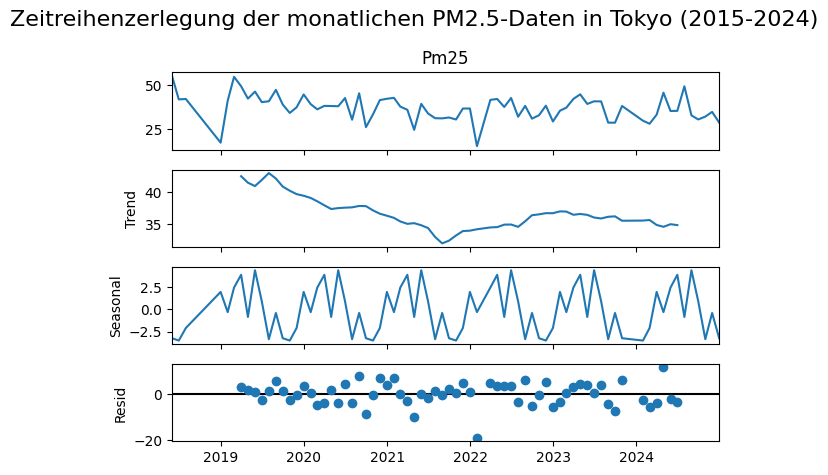

In [10]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Filtern: Nur Daten von 2015 bis 2024 behalten
df_tokyo_filtered = df_tokyo[(df_tokyo.index.year >= 2015) & (df_tokyo.index.year <= 2024)]

# Überprüfen, welche Jahre jetzt enthalten sind
print("Enthaltene Jahre:", sorted(df_tokyo_filtered.index.year.unique()))

# Aggregiere die PM2.5-Daten auf monatlicher Basis (mittlere Werte)
df_tokyo_monthly = df_tokyo_filtered['Pm25'].resample('M').mean().dropna()

# Zeitreihenzerlegung (additives Modell mit period=12 für monatliche Daten
result = seasonal_decompose(df_tokyo_monthly, model='additive', period=12)

# Visualisierung der Zerlegung
result.plot()

plt.suptitle('Zeitreihenzerlegung der monatlichen PM2.5-Daten in Tokyo (2015-2024)', fontsize=16)
plt.tight_layout();

In [11]:
# Trend extrahieren und als DataFrame speichern
trend_tokyo = result.trend.dropna().reset_index()
trend_tokyo.columns = ["Datum", "Trend"]
trend_tokyo["City"] = "Tokyo"

In [12]:
trend_tokyo

,Datum,Trend,City
0,2019-03-31,42.439462,Tokyo
1,2019-04-30,41.432436,Tokyo
2,2019-05-31,40.910214,Tokyo
3,2019-06-30,41.861028,Tokyo
4,2019-07-31,42.929901,Tokyo
...,...,...,...
56,2024-02-29,35.641725,Tokyo
57,2024-03-31,34.875059,Tokyo
58,2024-04-30,34.589127,Tokyo
59,2024-05-31,34.991233,Tokyo


Enthaltene Jahre: [2018, 2019, 2020, 2021, 2022, 2023, 2024]


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/1214251675.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_osaka_monthly = df_osaka_filtered['Pm25'].resample('M').mean().dropna()


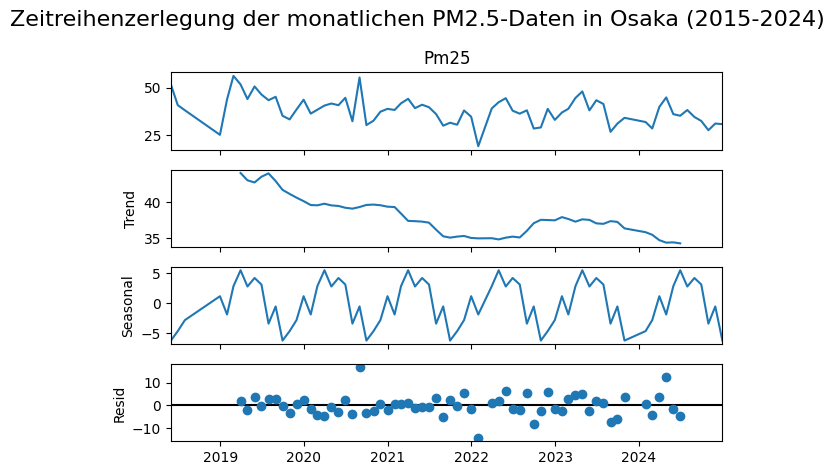

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtern: Nur Daten von 2015 bis 2024 behalten
df_osaka_filtered = df_osaka[(df_osaka.index.year >= 2015) & (df_osaka.index.year <= 2024)]

# Überprüfen, welche Jahre jetzt enthalten sind
print("Enthaltene Jahre:", sorted(df_osaka_filtered.index.year.unique()))

# Aggregiere die PM2.5-Daten auf monatlicher Basis (mittlere Werte)
df_osaka_monthly = df_osaka_filtered['Pm25'].resample('M').mean().dropna()

# Zeitreihenzerlegung (additives Modell mit period=12 für monatliche Daten
result = seasonal_decompose(df_osaka_monthly, model='additive', period=12)

# Visualisierung der Zerlegung
result.plot()

plt.suptitle('Zeitreihenzerlegung der monatlichen PM2.5-Daten in Osaka (2015-2024)', fontsize=16)
plt.tight_layout();

In [15]:
# Trend extrahieren und als DataFrame speichern
trend_osaka = result.trend.dropna().reset_index()
trend_osaka.columns = ["Datum", "Trend"]
trend_osaka["City"] = "Osaka"

In [16]:
trend_osaka

,Datum,Trend,City
0,2019-03-31,43.998092,Osaka
1,2019-04-30,42.996653,Osaka
2,2019-05-31,42.699207,Osaka
3,2019-06-30,43.490299,Osaka
4,2019-07-31,43.950522,Osaka
...,...,...,...
56,2024-02-29,35.464175,Osaka
57,2024-03-31,34.720940,Osaka
58,2024-04-30,34.382678,Osaka
59,2024-05-31,34.420357,Osaka


Enthaltene Jahre: [2018, 2019, 2020, 2021, 2022, 2023, 2024]


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_50023/3036781577.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_delhi_monthly = df_delhi_filtered['Pm25'].resample('M').mean().dropna()


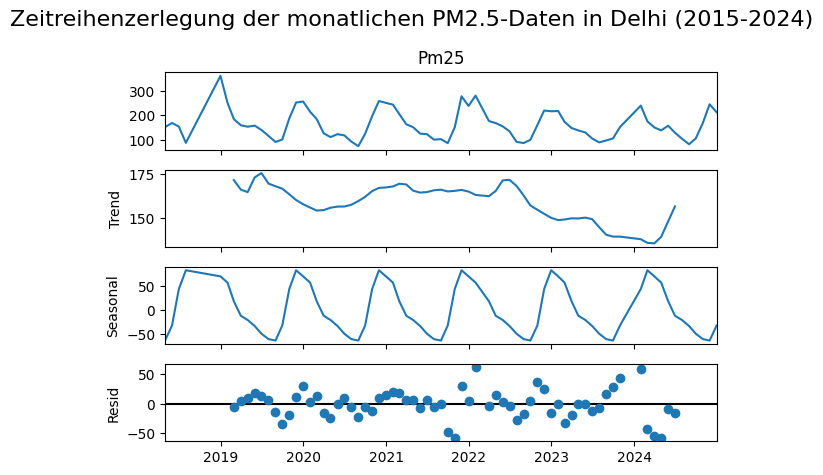

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtern: Nur Daten von 2015 bis 2024 behalten
df_delhi_filtered = df_delhi[(df_delhi.index.year >= 2015) & (df_delhi.index.year <= 2024)]

# Überprüfen, welche Jahre jetzt enthalten sind
print("Enthaltene Jahre:", sorted(df_delhi_filtered.index.year.unique()))

# Aggregiere die PM2.5-Daten auf monatlicher Basis (mittlere Werte)
df_delhi_monthly = df_delhi_filtered['Pm25'].resample('M').mean().dropna()

# Zeitreihenzerlegung (additives Modell mit period=12 für monatliche Daten
result = seasonal_decompose(df_delhi_monthly, model='additive', period=12)

# Visualisierung der Zerlegung
result.plot()

plt.suptitle('Zeitreihenzerlegung der monatlichen PM2.5-Daten in Delhi (2015-2024)', fontsize=16)
plt.tight_layout();

In [19]:
# Trend extrahieren und als DataFrame speichern
trend_delhi = result.trend.dropna().reset_index()
trend_delhi.columns = ["Datum", "Trend"]
trend_delhi["City"] = "Delhi"

In [20]:
trend_delhi

,Datum,Trend,City
0,2019-02-28,171.421875,Delhi
1,2019-03-31,166.034031,Delhi
2,2019-04-30,164.602052,Delhi
3,2019-05-31,172.917868,Delhi
4,2019-06-30,175.428665,Delhi
...,...,...,...
57,2024-02-29,135.825629,Delhi
58,2024-03-31,135.529303,Delhi
59,2024-04-30,139.208559,Delhi
60,2024-05-31,148.071417,Delhi


In [21]:
trend_gesamt = pd.concat([trend_tokyo, trend_osaka, trend_delhi], ignore_index=True)
trend_gesamt.to_csv("data/trendlinien_pm25.csv", index=False)

In [ ]:
df_trend = pd.read_csv("data/trendlinien_pm25.csv")
print(df_trend["City"].unique())

# 1. Dokumentation

Was man später beim Skalieren nicht vergesen darf:

Liniendiagramm:

✅ Mein Plan für den skalierbaren Umgang mit mehr Städten:
🔹 1. Stadtanzahl begrenzen (z. B. Top 10 nach Jahresmittelwert)

# Top 10 Städte mit höchsten Mittelwerten im letzten Jahr
top_staedte = df_letztes_jahr.sort_values(by=auswahl, ascending=False).head(10)

So bleibt das Diagramm übersichtlich und zeigt die „interessantesten Fälle“ zuerst.

🔹 2. Farben automatisch generieren (mit Colormap)

Wir lassen Matplotlib die Farben aus einer Farbpalette wählen – z. B. "viridis", "plasma", "Set2", "tab10", etc.

import matplotlib.cm as cm
import numpy as np

# Colormap definieren
cmap = cm.get_cmap("tab10", len(top_staedte))

# Farben automatisch zuweisen
colors = [cmap(i) for i in range(len(top_staedte))]


Dann beim Plotten:

ax_bar.bar(
    top_staedte["City"],
    top_staedte[auswahl],
    color=colors
)

🔹 3. Optional: Dropdown mit Städteauswahl oder Jahr

So kann man z. B. sagen:

    „Zeig mir die Top 10 Städte im Jahr 2022“
    oder
    „Zeig mir die 5 Städte mit der niedrigsten NO₂-Belastung im aktuellen Jahr“

🎁 Fazit für später:

Wenn du den Datensatz erweiterst, dann machen wir:

    intelligente Auswahl, z. B. Top 10

    automatische Farben

    flexible Steuerung durch Dropdown oder Slider

So bleibt dein Dashboard schön, verständlich und performant – auch bei vielen Städten.

In [ ]:
# Skalieren der Trendlinien
# seasonal_decompose rechnet nicht so schnell, deshalb sollte man die Daten vorher abspeichern.

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Original-DataFrame mit vielen Städten
df = pd.read_csv("deine_komplettdaten.csv")
df["Datum"] = pd.to_datetime(df[["Year", "Month", "Day"]])
df = df.set_index("Datum")

alle_staedte = df["City"].unique()
alle_trends = []

for stadt in alle_staedte:
    df_stadt = df[df["City"] == stadt]["Pm25"].resample("M").mean().dropna()

    if len(df_stadt) < 24:  # Sicherstellen: genug Daten für Trendberechnung
        continue

    try:
        result = seasonal_decompose(df_stadt, model="additive", period=12)
        trend = result.trend.dropna().reset_index()
        trend.columns = ["Datum", "Trend"]
        trend["City"] = stadt
        alle_trends.append(trend)
    except:
        print(f"Fehler bei Stadt: {stadt}")
        continue

# Alles zusammenführen
trend_gesamt = pd.concat(alle_trends, ignore_index=True)

# Speichern
trend_gesamt.to_csv("data/trendlinien_pm25_alle_staedte.csv", index=False)
